Loading cleaned data...
Data loaded: (20640, 12)

EXPLORATORY DATA ANALYSIS

Descriptive Statistics:
         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
count  20640.00  20640.00  20640.00   20640.00    20640.00  20640.00   
mean       3.87     28.64      5.43       1.10     1425.48      3.07   
std        1.90     12.59      2.47       0.47     1132.46     10.39   
min        0.50      1.00      0.85       0.33        3.00      0.69   
25%        2.56     18.00      4.44       1.01      787.00      2.43   
50%        3.53     29.00      5.23       1.05     1166.00      2.82   
75%        4.74     37.00      6.05       1.10     1725.00      3.28   
max       15.00     52.00    141.91      34.07    35682.00   1243.33   

       Latitude  Longitude  MedHouseVal  RoomsPerHousehold  \
count  20640.00   20640.00     20640.00           20640.00   
mean      35.63    -119.57         2.07               1.98   
std        2.14       2.00         1.15               1.15   
mi

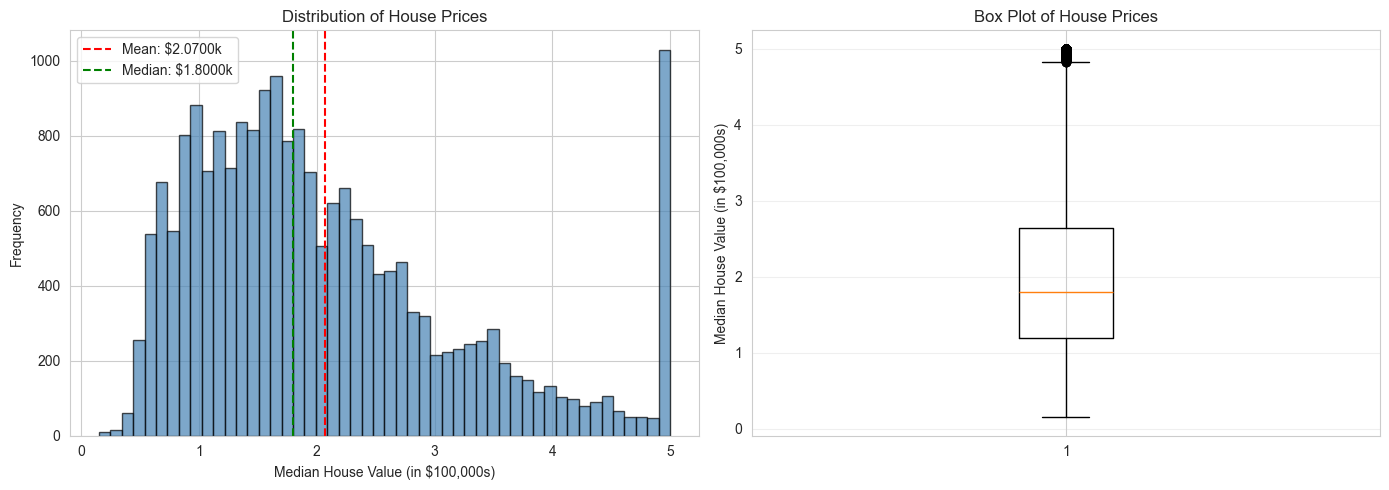

Key findings:
- Mean house price: $2.0700k
- Median house price: $1.8000k
- The distribution is right-skewed with a cap at $500k

VISUALIZATION 2: Correlation Heatmap


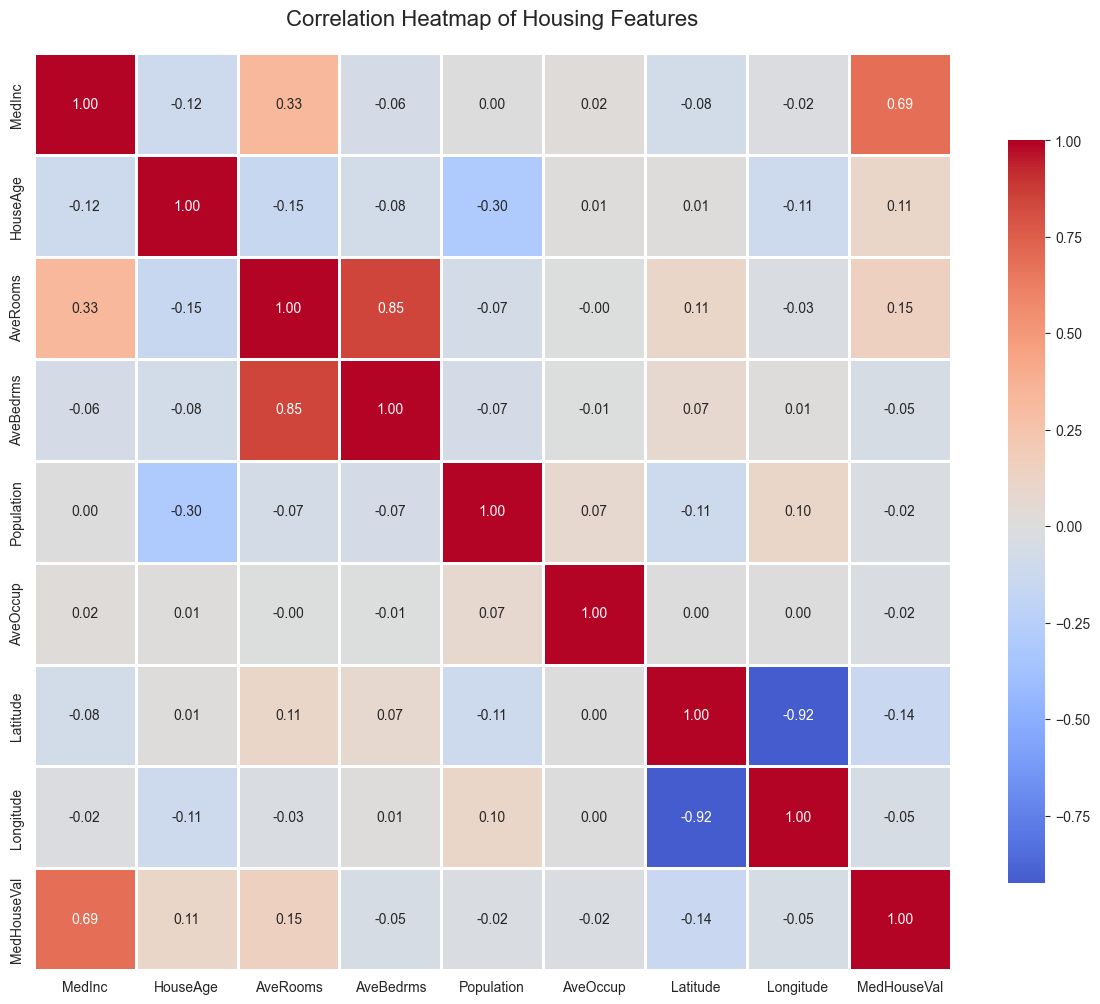

Key correlations with House Price:
- MedInc: 0.688
- AveRooms: 0.152
- HouseAge: 0.106
- AveOccup: -0.024
- Population: -0.025
- Longitude: -0.046
- AveBedrms: -0.047
- Latitude: -0.144

VISUALIZATION 3: Income vs House Price


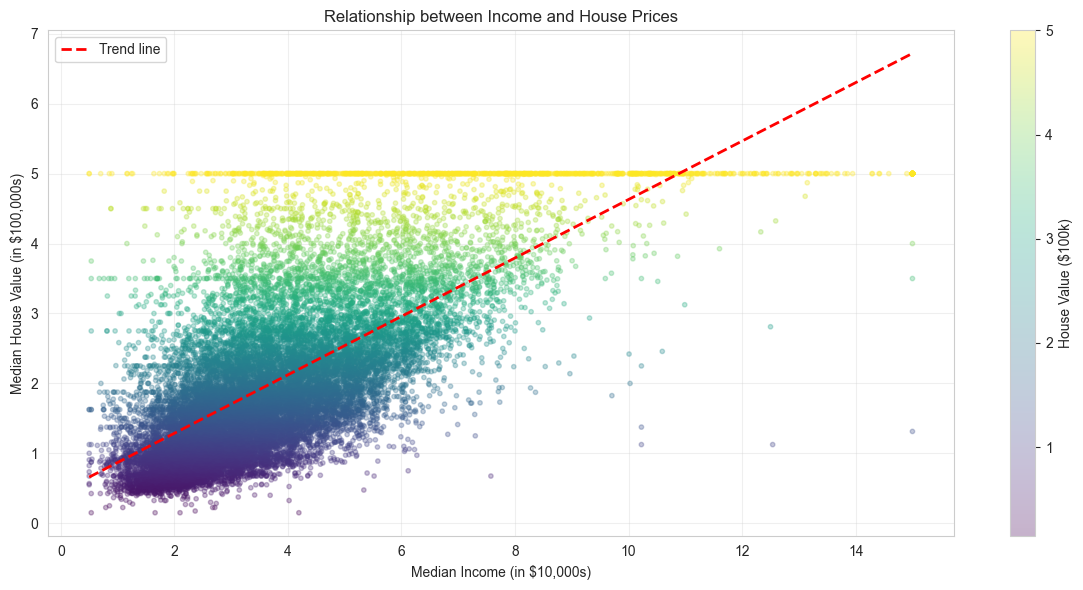

Correlation between Income and Price: 0.688
- Strong positive correlation!
- Higher income areas have higher house prices

VISUALIZATION 4: Geographic Distribution of Prices


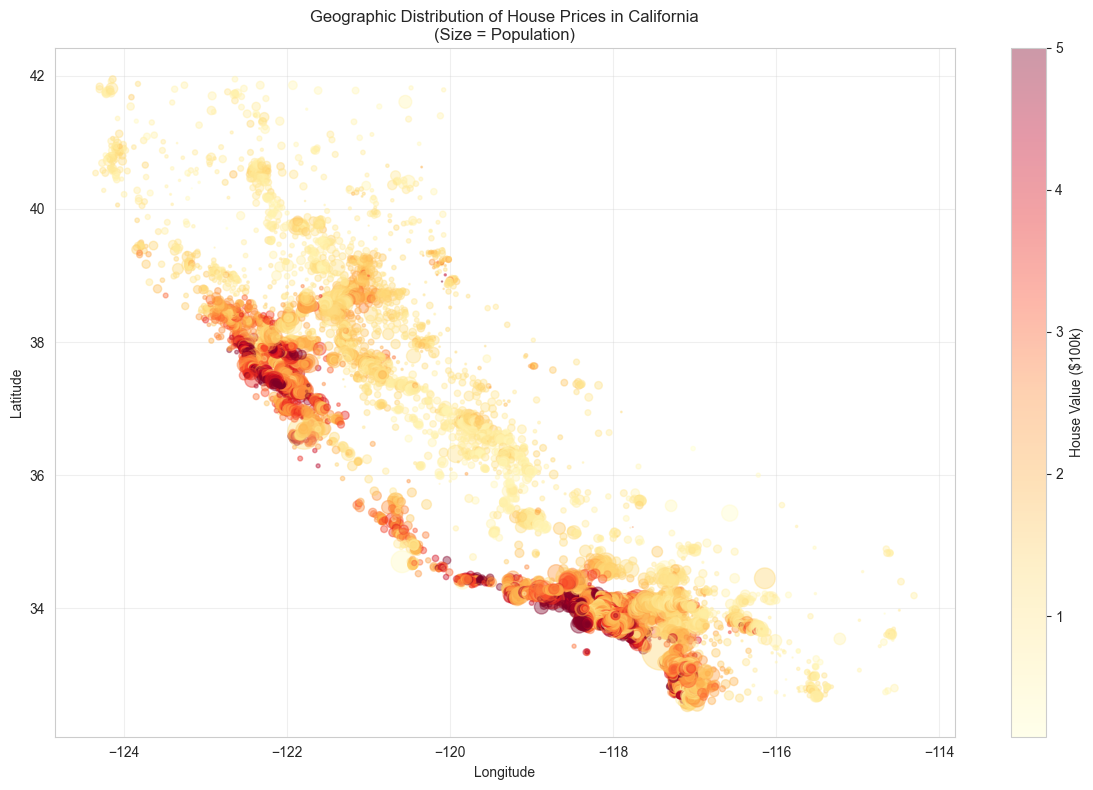

- Coastal areas (lower longitude values) tend to have higher prices
- Clear geographic patterns visible
- Population centers show concentration of data points

VISUALIZATION 5: Feature Distributions


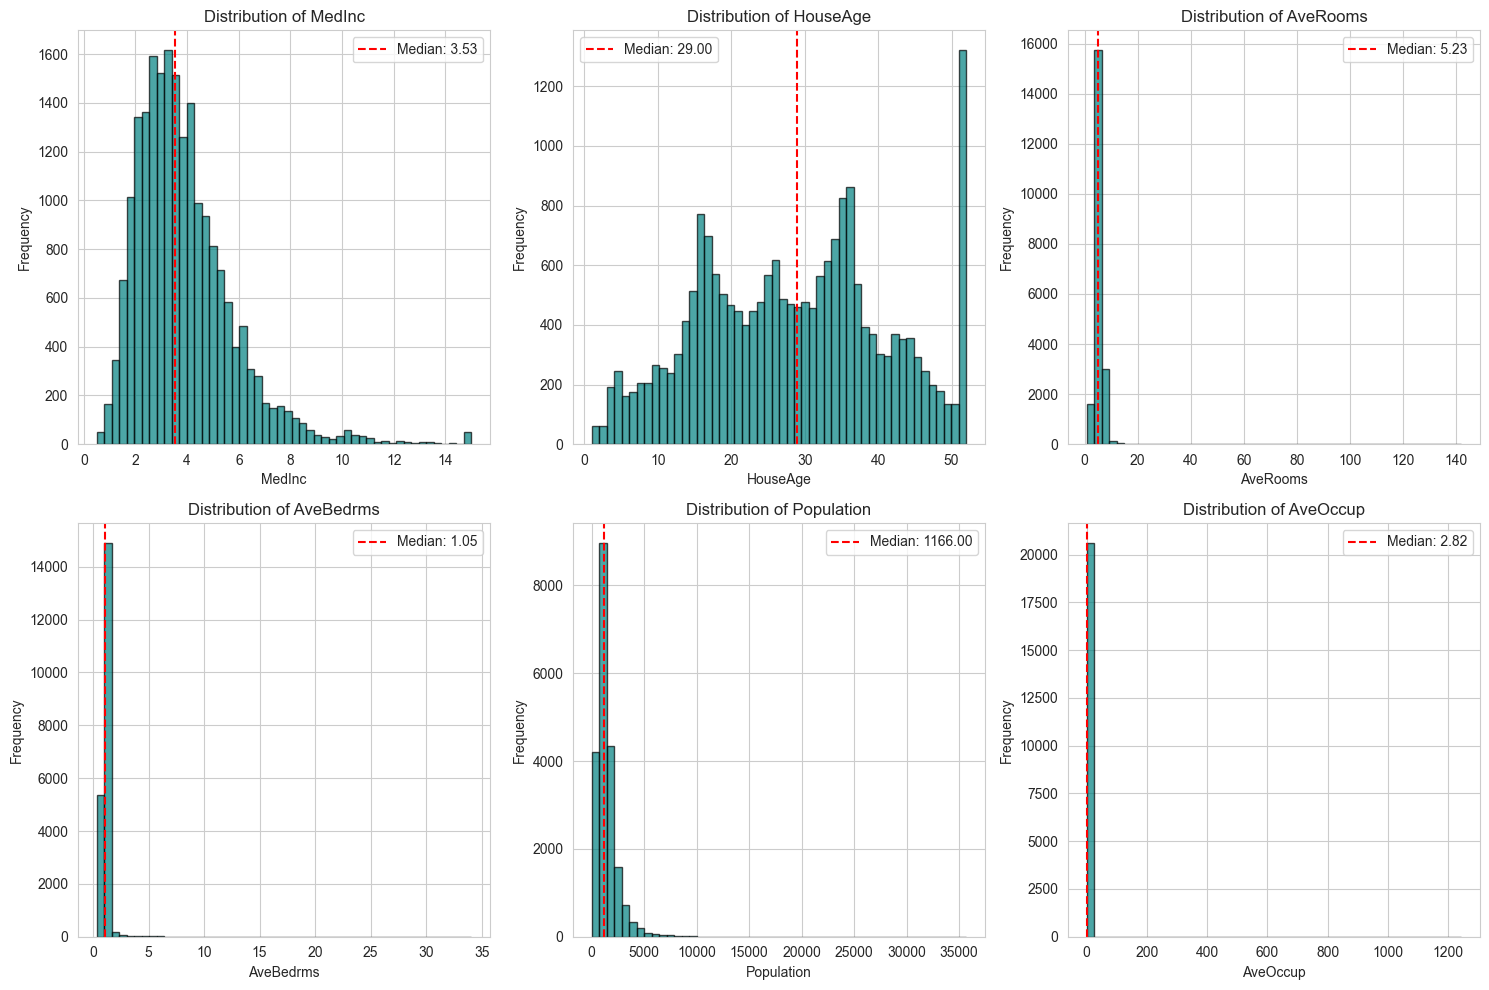

Distribution characteristics:
- MedInc: Mean=3.87, Median=3.53, Skew=1.65
- HouseAge: Mean=28.64, Median=29.00, Skew=0.06
- AveRooms: Mean=5.43, Median=5.23, Skew=20.70
- AveBedrms: Mean=1.10, Median=1.05, Skew=31.32
- Population: Mean=1425.48, Median=1166.00, Skew=4.94
- AveOccup: Mean=3.07, Median=2.82, Skew=97.64

VISUALIZATION 6: Price Categories Analysis


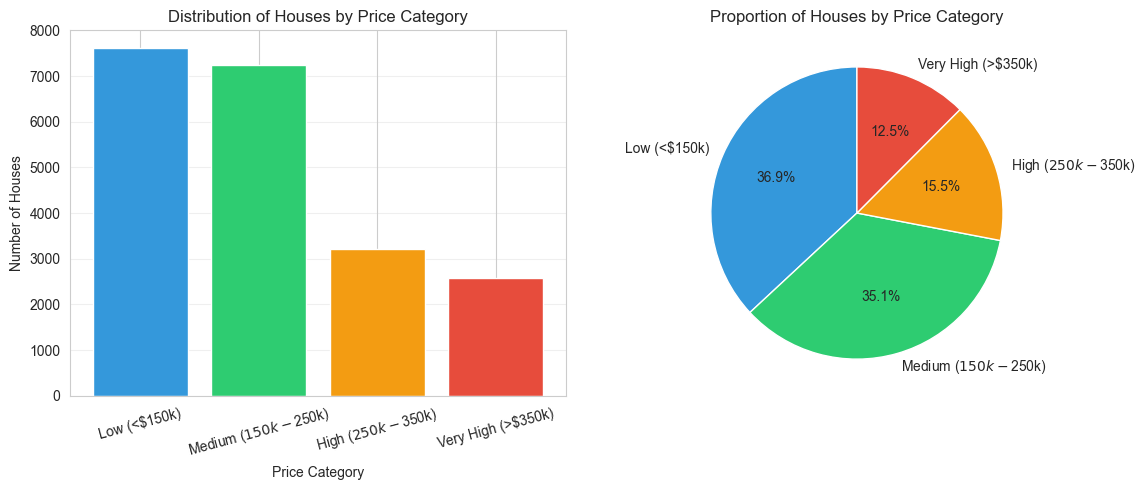

- Low (<$150k): 7620 houses (36.9%)
- Medium ($150k-$250k): 7238 houses (35.1%)
- High ($250k-$350k): 3209 houses (15.5%)
- Very High (>$350k): 2573 houses (12.5%)

VISUALIZATION 7: House Age vs Price


C:\Users\user\AppData\Local\Temp\ipykernel_7336\1259495113.py:210: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups = df.groupby(pd.cut(df['HouseAge'], bins=10))['MedHouseVal'].mean()


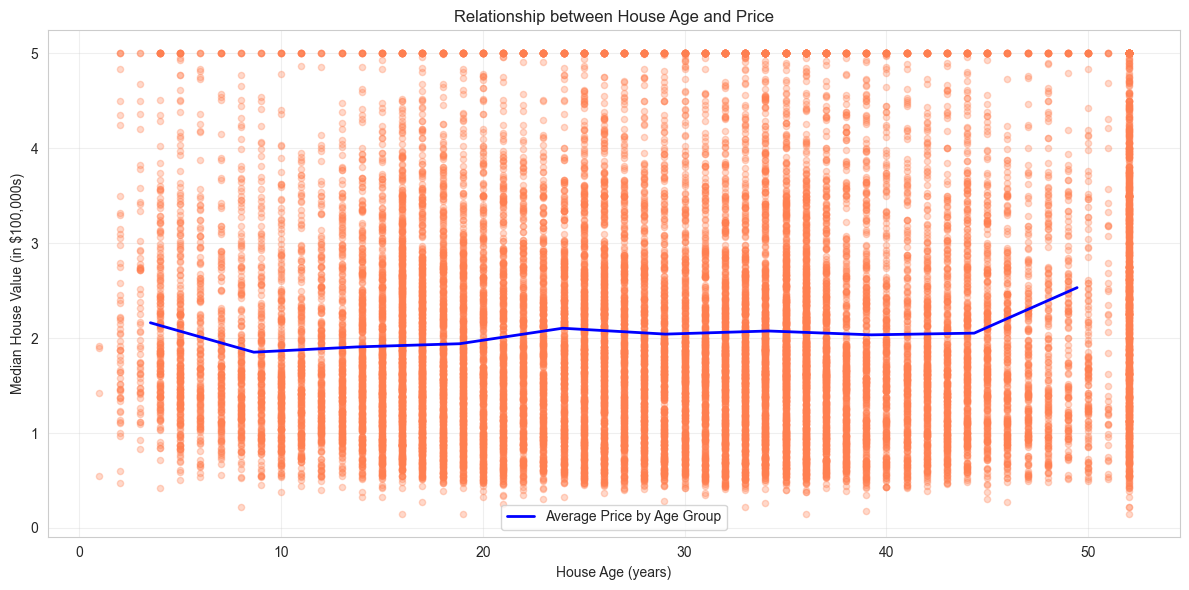

Correlation between Age and Price: 0.106
- Weak positive correlation
- Age alone doesn't strongly determine price

STATISTICAL ANALYSIS SUMMARY

1. CENTRAL TENDENCIES:
   Mean Price: $2.0700k
   Median Price: $1.8000k
   Mode Price: $5.0000k

2. VARIABILITY:
   Standard Deviation: $1.1500k
   Range: $0.1500k - $5.0000k
   IQR: $1.4500k

3. TOP CORRELATIONS WITH PRICE:
   MedInc: 0.688
   AveRooms: 0.152
   Latitude: -0.144

4. KEY INSIGHTS:
   ✓ Median income is the strongest predictor of house prices
   ✓ Geographic location (lat/long) plays a significant role
   ✓ Coastal areas command premium prices
   ✓ Most houses fall in the $100k-$250k range
   ✓ House age has minimal impact on price

EDA Complete! All visualizations saved to ../reports/figures/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set style for better looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load cleaned data
print("Loading cleaned data...")
df = pd.read_csv('../data/processed/california_housing_clean.csv')
print(f"Data loaded: {df.shape}")

print("\n" + "="*70)
print("EXPLORATORY DATA ANALYSIS")
print("="*70)

# Basic statistics
print("\nDescriptive Statistics:")
print(df.describe().round(2))

# Create figures directory if it doesn't exist
os.makedirs('../reports/figures', exist_ok=True)

print("\n" + "="*70)
print("VISUALIZATION 1: Distribution of House Prices")
print("="*70)

plt.figure(figsize=(14, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df['MedHouseVal'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Median House Value (in $100,000s)')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.axvline(df['MedHouseVal'].mean(), color='red', linestyle='--', label=f'Mean: ${df["MedHouseVal"].mean():.2f}00k')
plt.axvline(df['MedHouseVal'].median(), color='green', linestyle='--', label=f'Median: ${df["MedHouseVal"].median():.2f}00k')
plt.legend()

# Box plot
plt.subplot(1, 2, 2)
plt.boxplot(df['MedHouseVal'], vert=True)
plt.ylabel('Median House Value (in $100,000s)')
plt.title('Box Plot of House Prices')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/01_price_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Key findings:")
print(f"- Mean house price: ${df['MedHouseVal'].mean():.2f}00k")
print(f"- Median house price: ${df['MedHouseVal'].median():.2f}00k")
print(f"- The distribution is right-skewed with a cap at $500k")

print("\n" + "="*70)
print("VISUALIZATION 2: Correlation Heatmap")
print("="*70)

# Select original features for correlation
correlation_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 
                        'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']
correlation_matrix = df[correlation_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Housing Features', fontsize=16, pad=20)
plt.tight_layout()
plt.savefig('../reports/figures/02_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("Key correlations with House Price:")
correlations = correlation_matrix['MedHouseVal'].sort_values(ascending=False)
for feature, corr in correlations.items():
    if feature != 'MedHouseVal':
        print(f"- {feature}: {corr:.3f}")

print("\n" + "="*70)
print("VISUALIZATION 3: Income vs House Price")
print("="*70)

plt.figure(figsize=(12, 6))
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.3, c=df['MedHouseVal'], 
            cmap='viridis', s=10)
plt.colorbar(label='House Value ($100k)')
plt.xlabel('Median Income (in $10,000s)')
plt.ylabel('Median House Value (in $100,000s)')
plt.title('Relationship between Income and House Prices')
plt.grid(alpha=0.3)

# Add trend line
z = np.polyfit(df['MedInc'], df['MedHouseVal'], 1)
p = np.poly1d(z)
plt.plot(df['MedInc'].sort_values(), p(df['MedInc'].sort_values()), 
         "r--", linewidth=2, label=f'Trend line')
plt.legend()

plt.tight_layout()
plt.savefig('../reports/figures/03_income_vs_price.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Correlation between Income and Price: {df['MedInc'].corr(df['MedHouseVal']):.3f}")
print("- Strong positive correlation!")
print("- Higher income areas have higher house prices")

print("\n" + "="*70)
print("VISUALIZATION 4: Geographic Distribution of Prices")
print("="*70)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Longitude'], df['Latitude'], 
                     c=df['MedHouseVal'], cmap='YlOrRd', 
                     alpha=0.4, s=df['Population']/50)
plt.colorbar(scatter, label='House Value ($100k)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of House Prices in California\n(Size = Population)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../reports/figures/04_geographic_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("- Coastal areas (lower longitude values) tend to have higher prices")
print("- Clear geographic patterns visible")
print("- Population centers show concentration of data points")

print("\n" + "="*70)
print("VISUALIZATION 5: Feature Distributions")
print("="*70)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
features_to_plot = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

for idx, feature in enumerate(features_to_plot):
    row = idx // 3
    col = idx % 3
    axes[row, col].hist(df[feature], bins=50, color='teal', edgecolor='black', alpha=0.7)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].axvline(df[feature].median(), color='red', linestyle='--', 
                           label=f'Median: {df[feature].median():.2f}')
    axes[row, col].legend()

plt.tight_layout()
plt.savefig('../reports/figures/05_feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("Distribution characteristics:")
for feature in features_to_plot:
    skewness = df[feature].skew()
    print(f"- {feature}: Mean={df[feature].mean():.2f}, Median={df[feature].median():.2f}, Skew={skewness:.2f}")

print("\n" + "="*70)
print("VISUALIZATION 6: Price Categories Analysis")
print("="*70)

# Create price categories for better analysis
df['PriceCategory'] = pd.cut(df['MedHouseVal'], 
                              bins=[0, 1.5, 2.5, 3.5, 5.5], 
                              labels=['Low (<$150k)', 'Medium ($150k-$250k)', 
                                     'High ($250k-$350k)', 'Very High (>$350k)'])

plt.figure(figsize=(12, 5))

# Count plot
plt.subplot(1, 2, 1)
category_counts = df['PriceCategory'].value_counts().sort_index()
plt.bar(range(len(category_counts)), category_counts.values, 
        color=['#3498db', '#2ecc71', '#f39c12', '#e74c3c'])
plt.xticks(range(len(category_counts)), category_counts.index, rotation=15)
plt.xlabel('Price Category')
plt.ylabel('Number of Houses')
plt.title('Distribution of Houses by Price Category')
plt.grid(axis='y', alpha=0.3)

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
        colors=['#3498db', '#2ecc71', '#f39c12', '#e74c3c'], startangle=90)
plt.title('Proportion of Houses by Price Category')

plt.tight_layout()
plt.savefig('../reports/figures/06_price_categories.png', dpi=300, bbox_inches='tight')
plt.show()

for category, count in category_counts.items():
    print(f"- {category}: {count} houses ({count/len(df)*100:.1f}%)")

print("\n" + "="*70)
print("VISUALIZATION 7: House Age vs Price")
print("="*70)

plt.figure(figsize=(12, 6))
plt.scatter(df['HouseAge'], df['MedHouseVal'], alpha=0.3, c='coral', s=20)
plt.xlabel('House Age (years)')
plt.ylabel('Median House Value (in $100,000s)')
plt.title('Relationship between House Age and Price')
plt.grid(alpha=0.3)

# Add average price line by age groups
age_groups = df.groupby(pd.cut(df['HouseAge'], bins=10))['MedHouseVal'].mean()
age_midpoints = [(interval.left + interval.right)/2 for interval in age_groups.index]
plt.plot(age_midpoints, age_groups.values, 'b-', linewidth=2, label='Average Price by Age Group')
plt.legend()

plt.tight_layout()
plt.savefig('../reports/figures/07_age_vs_price.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Correlation between Age and Price: {df['HouseAge'].corr(df['MedHouseVal']):.3f}")
print("- Weak positive correlation")
print("- Age alone doesn't strongly determine price")

print("\n" + "="*70)
print("STATISTICAL ANALYSIS SUMMARY")
print("="*70)

# Key statistics
print("\n1. CENTRAL TENDENCIES:")
print(f"   Mean Price: ${df['MedHouseVal'].mean():.2f}00k")
print(f"   Median Price: ${df['MedHouseVal'].median():.2f}00k")
print(f"   Mode Price: ${df['MedHouseVal'].mode()[0]:.2f}00k")

print("\n2. VARIABILITY:")
print(f"   Standard Deviation: ${df['MedHouseVal'].std():.2f}00k")
print(f"   Range: ${df['MedHouseVal'].min():.2f}00k - ${df['MedHouseVal'].max():.2f}00k")
print(f"   IQR: ${df['MedHouseVal'].quantile(0.75) - df['MedHouseVal'].quantile(0.25):.2f}00k")

print("\n3. TOP CORRELATIONS WITH PRICE:")
top_corr = correlation_matrix['MedHouseVal'].abs().sort_values(ascending=False)[1:4]
for feature, corr_value in top_corr.items():
    print(f"   {feature}: {correlation_matrix.loc[feature, 'MedHouseVal']:.3f}")

print("\n4. KEY INSIGHTS:")
print("   ✓ Median income is the strongest predictor of house prices")
print("   ✓ Geographic location (lat/long) plays a significant role")
print("   ✓ Coastal areas command premium prices")
print("   ✓ Most houses fall in the $100k-$250k range")
print("   ✓ House age has minimal impact on price")

print("\n" + "="*70)
print("EDA Complete! All visualizations saved to ../reports/figures/")
print("="*70)